## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
df = pd.read_csv('https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz')

In [2]:
df.head()

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


In [3]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
df.category.describe()

count     30165
unique        7
top         INT
freq       7328
Name: category, dtype: object

In [4]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
df.sample(3)

text  \
10862                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        il a fallu des mois de négociations et de concertation avec les représentants des consommateurs des producteurs de disques et des sociétés d'auteurs pour mettre au point le projet de loi qui devait être présenté mercredi 12 novembre au conseil des ministres ce texte qui doit être examiné au parlement au cours du premier semestre 2004 vise à transposer de façon certes tardive la directive européenne sur les droits d'auteur du 22 mai 2001 dans le droit français il adapte aussi la législation actuelle du droit d'auteur et des droits voisins qui concernent les producteurs et les artistes interprètes le texte préserve la notion très française de copie privée toute copie de film dvd de disque cd réservée à son usage personnel qui n'est destinée ni à être vendue ni à des amis ne nécessite pas l'accord du ou des ayants droit la loi française tout comme la directive européenne ne prévoit pas le nombre de copies ce qui aurait été trop complexe à définir vu l'évolution technologique très rapide des formats qui permettent de copier explique-t-on dans l'entourage de jean-jacques aillagon le ministre de la culture et de la communication le projet de loi précise toutefois que l'etat devra veiller à ce que les ayants droit fixent ce nombre de copies dans un délai raisonnable les mesures anti-copies mises en place notamment par les éditeurs ne devront pas empêcher la copie privée pour éviter des différends trop importants entre consommateurs et représentants des ayants droit le projet de loi envisage de créer un collège de médiateurs un peu sur le modèle de ce qui existe dans le domaine du cinéma en cas de conflit trois magistrats tenteront de concilier les parties et à défaut auront deux mois pour statuer les décisions exécutoires de ce collège seront assorties d'astreintes et elles seront susceptibles de recours uniquement devant la cour d'appel de paris en contrepartie le projet de loi met en place des sanctions pénales destinées à ceux qui contourneront les mesures techniques anti-copies ces pratiques s'assimileront à de la contrefaçon et leurs auteurs risqueront jusqu'à 150 000 euros d'amende et deux ans de prison par ailleurs le projet de loi permet aux associations de handicapés qui désirent par exemple traduire des livres en braille de ne plus demander l'autorisation des auteurs ou des éditeurs gestion sous contrôle le texte réforme également le régime des droits d'auteur qui s'appliquera à l'avenir aux agents publics par exemple les photographes qui travaillent à plein temps pour les musées ou encore les conservateurs qui écrivent un catalogue dans le cadre d'un commissariat d'exposition pourront sous certaines conditions être davantage rémunérés l'administration n'aura plus qu'un droit de préférence sur l'exploitation de ces oeuvres comme le souhaitent depuis longtemps les ayants dro

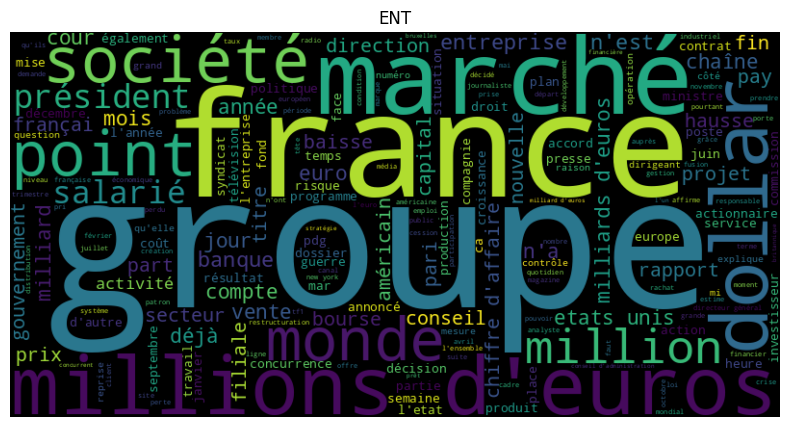

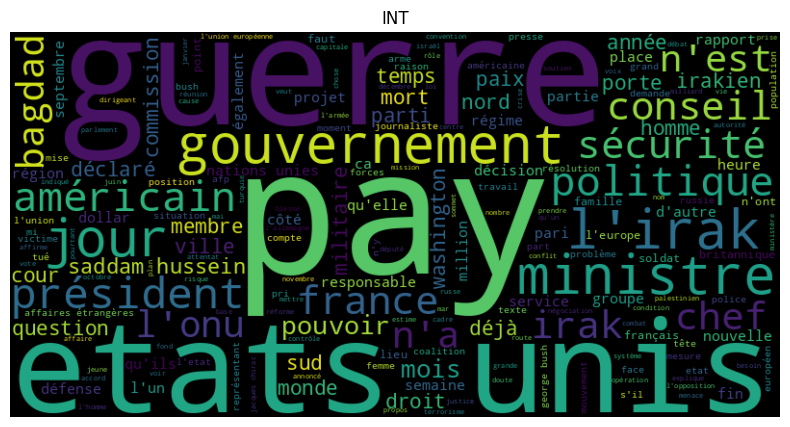

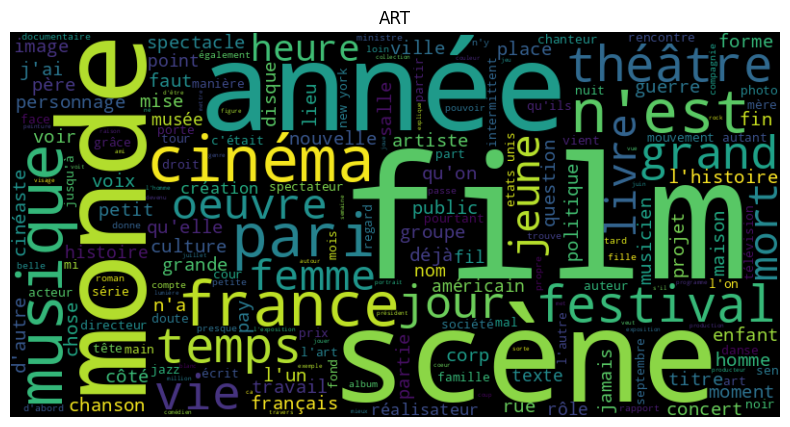

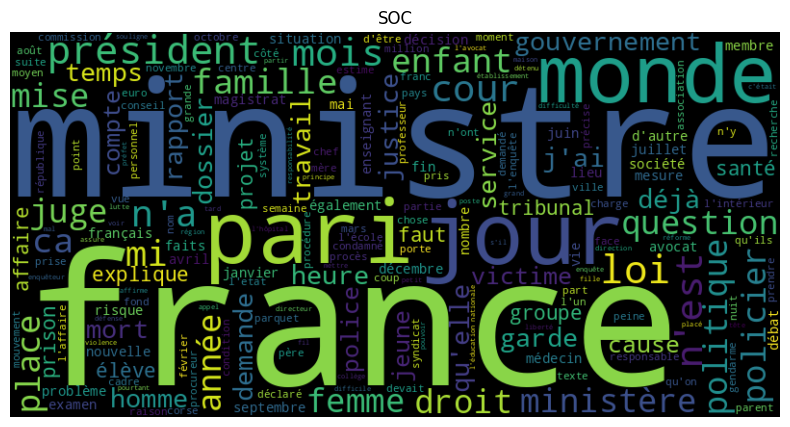

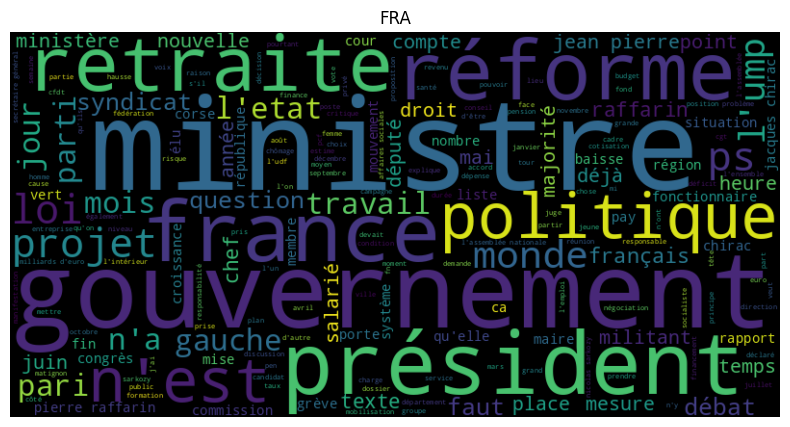

In [5]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    text = ' '.join(df[df.category == cat].text)
    wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(cat)
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
X = df.text
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24132,), (6033,), (24132,), (6033,))

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors

# create the vectorizer object
vectorizer = CountVectorizer(stop_words=STOPWORDS, max_features=10000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_vect = vectorizer.transform(X_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


In [8]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_vect, y_train)

# Evaluate
X_test_vect = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_vect)

from sklearn.metrics import accuracy_score
# Print the accuracy
accuracy_score(y_test, y_pred)

0.79678435272667

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer().fit(X_train_vect)
X_train_tf = tf_transformer.transform(X_train_vect)
X_test_tf = tf_transformer.transform(X_test_vect)

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


              precision    recall  f1-score   support

         ART       0.84      0.90      0.87       919
         ENT       0.87      0.87      0.87      1201
         FRA       0.67      0.75      0.71       737
         INT       0.87      0.84      0.85      1491
         SOC       0.71      0.77      0.74       741
         SPO       0.93      0.95      0.94       548
         UNE       0.18      0.10      0.13       396

    accuracy                           0.80      6033
   macro avg       0.72      0.74      0.73      6033
weighted avg       0.78      0.80      0.79      6033



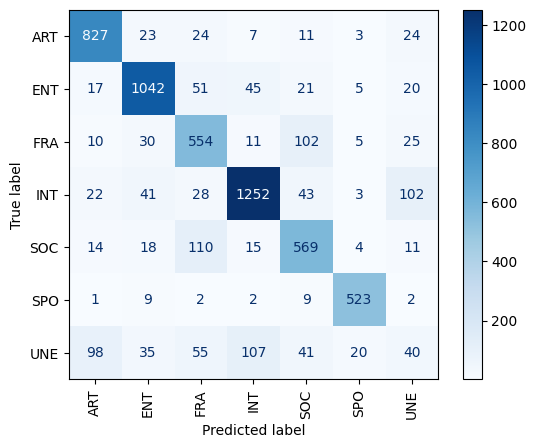

In [10]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')


## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

Train set size: 22488
Test set size: 5622


/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


Accuracy: 0.9053717538242618


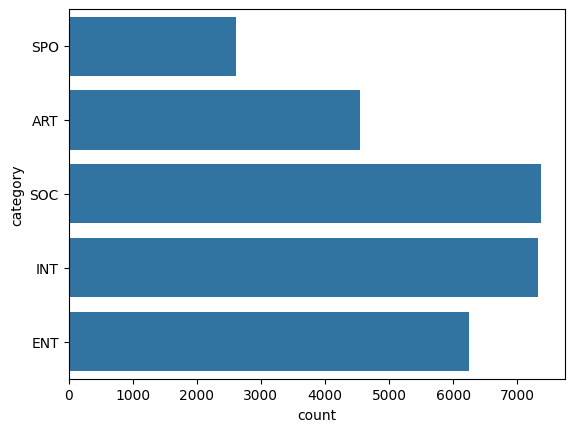

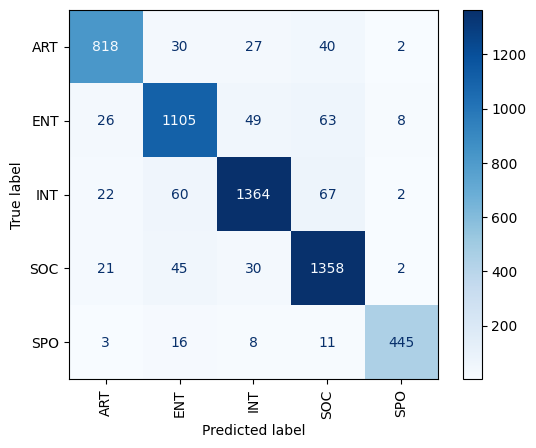

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns

# Filter out the UNE class
df = df[df.category != 'UNE']

# Merge classes 'FRANCE' and 'SOCIETE'
df.category = df.category.apply(lambda x: 'SOC' if x == 'FRA' else x)

# Plot the statistics of classes
sns.countplot(data=df, y='category')

# Make the splits and print the sizes for checking
# Split the dataset into train and test sets
X = df.text
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the splits
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

# Apply TfidfVectorizer
vectorizer = CountVectorizer(stop_words=STOPWORDS, max_features=10000)
vectorizer.fit(X_train)
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

tf_transformer = TfidfTransformer().fit(X_train_vect)
X_train_tf = tf_transformer.transform(X_train_vect)
X_test_tf = tf_transformer.transform(X_test_vect)

# Train MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Print accuracy
y_pred = clf.predict(X_test_tf)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print confusion matric
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')


## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [12]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

article_to_classify = df.sample().text.values[0]
candidate_labels = ['politique', 'sport', 'art', 'société', 'économie', 'science', 'technologie', 'international', 'france']
classifier(article_to_classify, candidate_labels)

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'sequence': "le constructeur automobile français et l'organisme public iranien chargé de l'industrie automobile idro ont signé lundi un contrat cadre en vue de créer une société commune au cours du premier trimestre 2004 ce projet vise à produire et commercialiser à partir de 2006 un modèle économique sous le nom de code x 90 avec une capacité de fabrication initiale de 200 000 voitures destinée aux marchés en dehors d'europe occidentale cette voiture devrait aussi être produite en roumanie en russie au maroc et en colombie en iran la société sera détenue à 51 par renault et à 49 par la société iranienne aid co une entité détenue par idro et les deux principaux constructeurs automobiles iraniens iran khodro et saipa avec 67 millions d'habitants l'iran a un marché automobile en forte croissance qui devrait selon le constructeur français atteindre cette année 700 000 véhicules particuliers et utilitaires",
 'labels': ['société',
  'international',
  'économie',
  'france',
  'technologi